In [2]:
import pandas as pd 
import numpy as np
import os
import pyprind
import matplotlib.pyplot as plt
import re
import itertools
import datetime
import csv
import nltk
from nltk.corpus import stopwords

In [3]:
dataframe = pd.read_csv('preprocess_data_analysis.csv')
dataframe.head()

,Unnamed: 0,Unnamed: 0.1,_id,text,task_1,task_2,text_clean
0,0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN,made ampamp able start making money sustain li...
1,1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN,technically thats still turning back clock dic...
2,2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE,youre govt stop thinking world media liberal g...
3,3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN,soldier japan dick head
4,4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN,youd better asking doesnt think hes sleazy shi...


Text(0, 0.5, 'Sentiment')

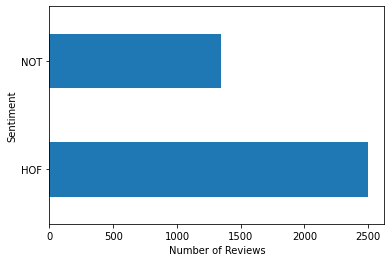

In [3]:
ax = dataframe['task_1'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Sentiment')

Text(0, 0.5, 'Sentiment')

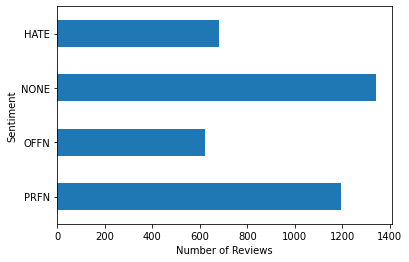

In [4]:
ax = dataframe['task_2'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Sentiment')

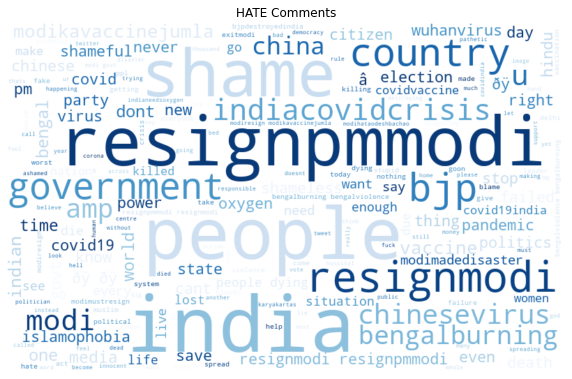

In [7]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in dataframe['text_clean'][dataframe['task_2'] == 'HATE']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Blues',background_color='White').generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("HATE Comments")
plt.axis('off') 
plt.show()

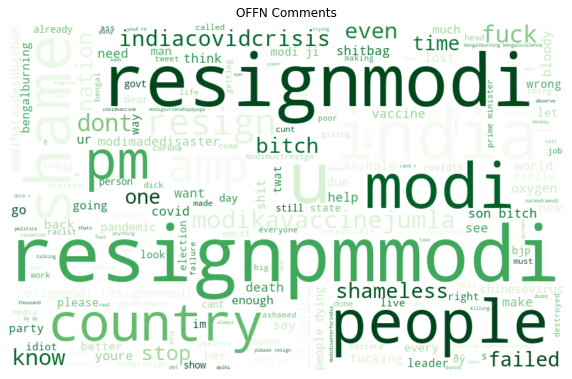

In [9]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in dataframe['text_clean'][dataframe['task_2'] == 'OFFN']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Greens',background_color='White').generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("OFFN Comments")
plt.axis('off') 
plt.show()

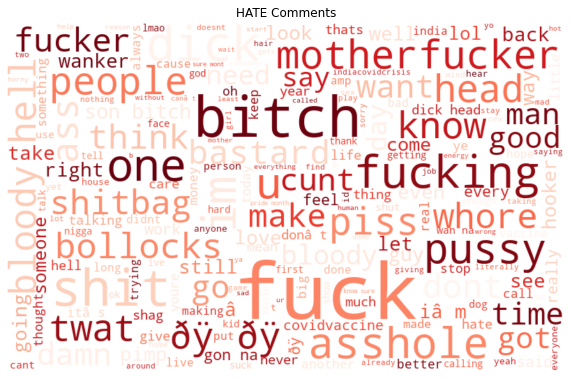

In [11]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in dataframe['text_clean'][dataframe['task_2'] == 'PRFN']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Reds',background_color='White').generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("HATE Comments")
plt.axis('off') 
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

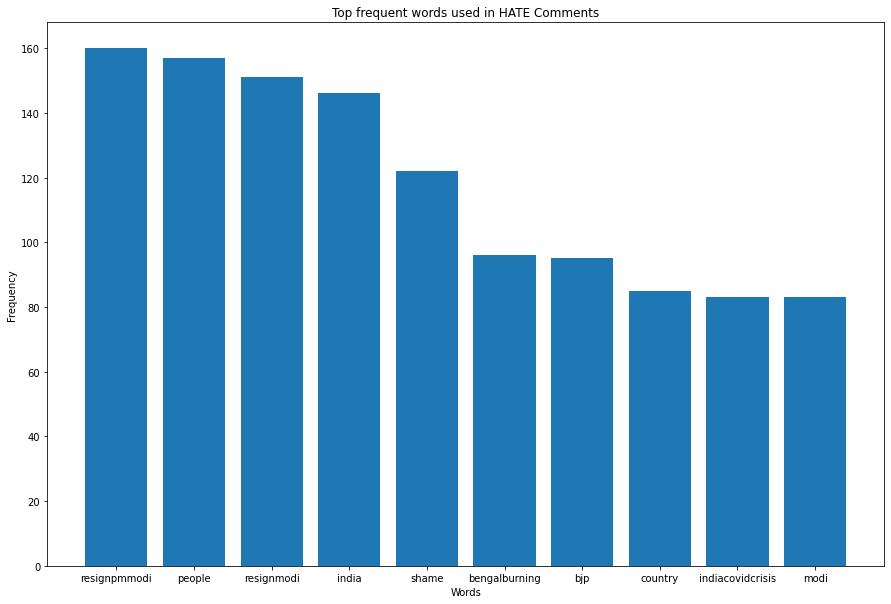

In [20]:
pos_bow = bow_vectorizer.fit_transform(dataframe['text_clean'][dataframe['task_2'] == 'HATE'])
pos_top_sum=pos_bow.toarray().sum(axis=0)
pos_top_sum_cv=[pos_top_sum]#to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names()


import operator
dic = {}
for i in range(len(pos_top_sum_cv[0])):
    dic[columns_cv[i]]=pos_top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))

sorted_dic = sorted_dic[:10]
xs, ys = [*zip(*sorted_dic)]
plt.figure(figsize=(15,10))
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top frequent words used in HATE Comments')
plt.show()

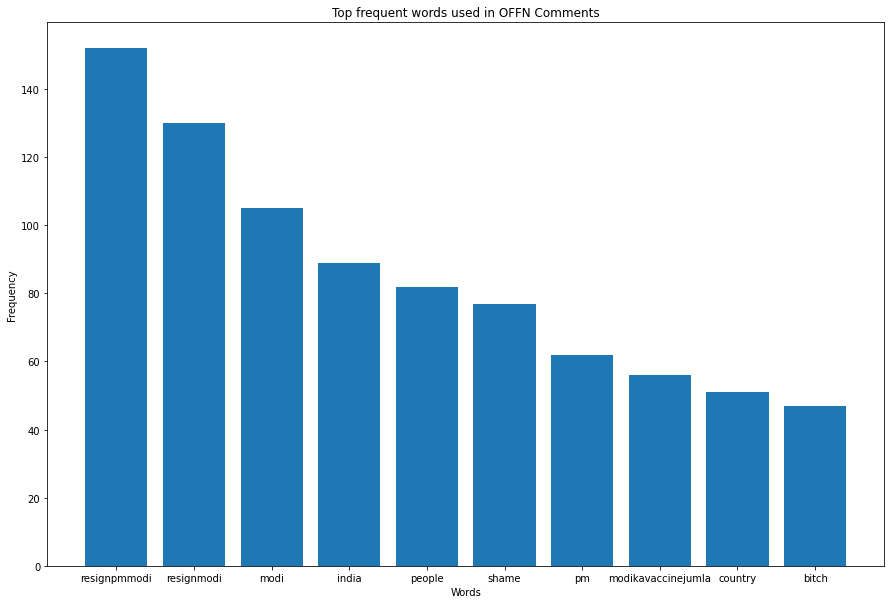

In [21]:
pos_bow = bow_vectorizer.fit_transform(dataframe['text_clean'][dataframe['task_2'] == 'OFFN'])
pos_top_sum=pos_bow.toarray().sum(axis=0)
pos_top_sum_cv=[pos_top_sum]#to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names()


import operator
dic = {}
for i in range(len(pos_top_sum_cv[0])):
    dic[columns_cv[i]]=pos_top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))

sorted_dic = sorted_dic[:10]
xs, ys = [*zip(*sorted_dic)]
plt.figure(figsize=(15,10))
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top frequent words used in OFFN Comments')
plt.show()

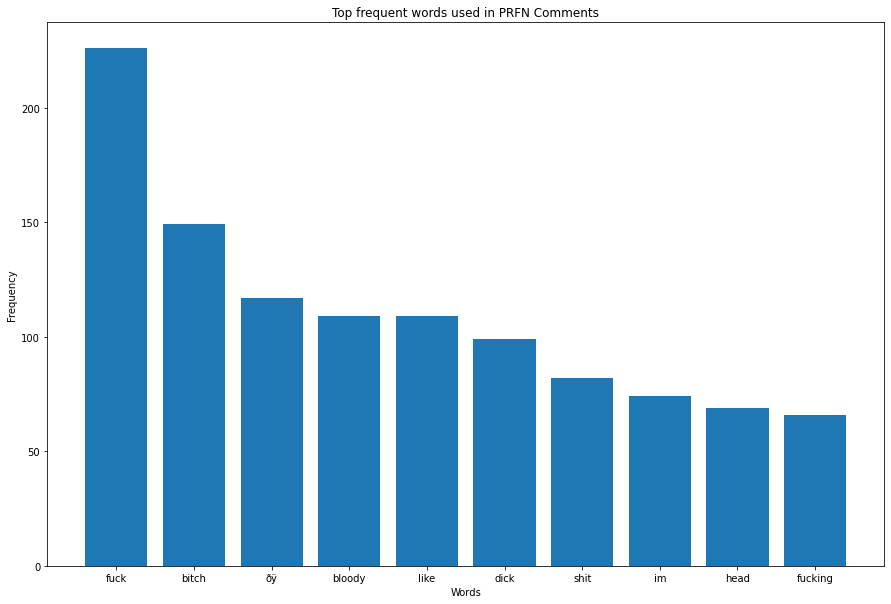

In [22]:
pos_bow = bow_vectorizer.fit_transform(dataframe['text_clean'][dataframe['task_2'] == 'PRFN'])
pos_top_sum=pos_bow.toarray().sum(axis=0)
pos_top_sum_cv=[pos_top_sum]#to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names()


import operator
dic = {}
for i in range(len(pos_top_sum_cv[0])):
    dic[columns_cv[i]]=pos_top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))

sorted_dic = sorted_dic[:10]
xs, ys = [*zip(*sorted_dic)]
plt.figure(figsize=(15,10))
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top frequent words used in PRFN Comments')
plt.show()

In [4]:
nltk.download('stopwords')
stopwordsList = stopwords.words('english')
stopwordsList.append('br')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swethasaseendran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Total word count
dataframe['word_count'] = dataframe['text_clean'].apply(lambda x: len(str(x).split()))

# Unique_word_count
dataframe['unique_word_count'] = dataframe['text_clean'].apply(lambda x: len(set(str(x).split())))

# Stop_Word_count
dataframe['stop_word_count'] = dataframe['text_clean'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwordsList]))

In [6]:
import string
# Mean_word_length
dataframe['mean_word_length'] = dataframe['text_clean'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Char_count
dataframe['char_count'] = dataframe['text_clean'].apply(lambda x: len(str(x)))

In [8]:
dataframe.head()

,Unnamed: 0,Unnamed: 0.1,_id,text,task_1,task_2,text_clean,word_count,unique_word_count,stop_word_count,mean_word_length,char_count
0,0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN,made ampamp able start making money sustain li...,18,18,0,5.333333,113
1,1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN,technically thats still turning back clock dic...,8,8,0,5.625000,52
2,2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE,youre govt stop thinking world media liberal g...,22,22,0,6.136364,156
3,3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN,soldier japan dick head,4,4,0,5.000000,23
4,4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN,youd better asking doesnt think hes sleazy shi...,9,9,0,5.222222,55


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

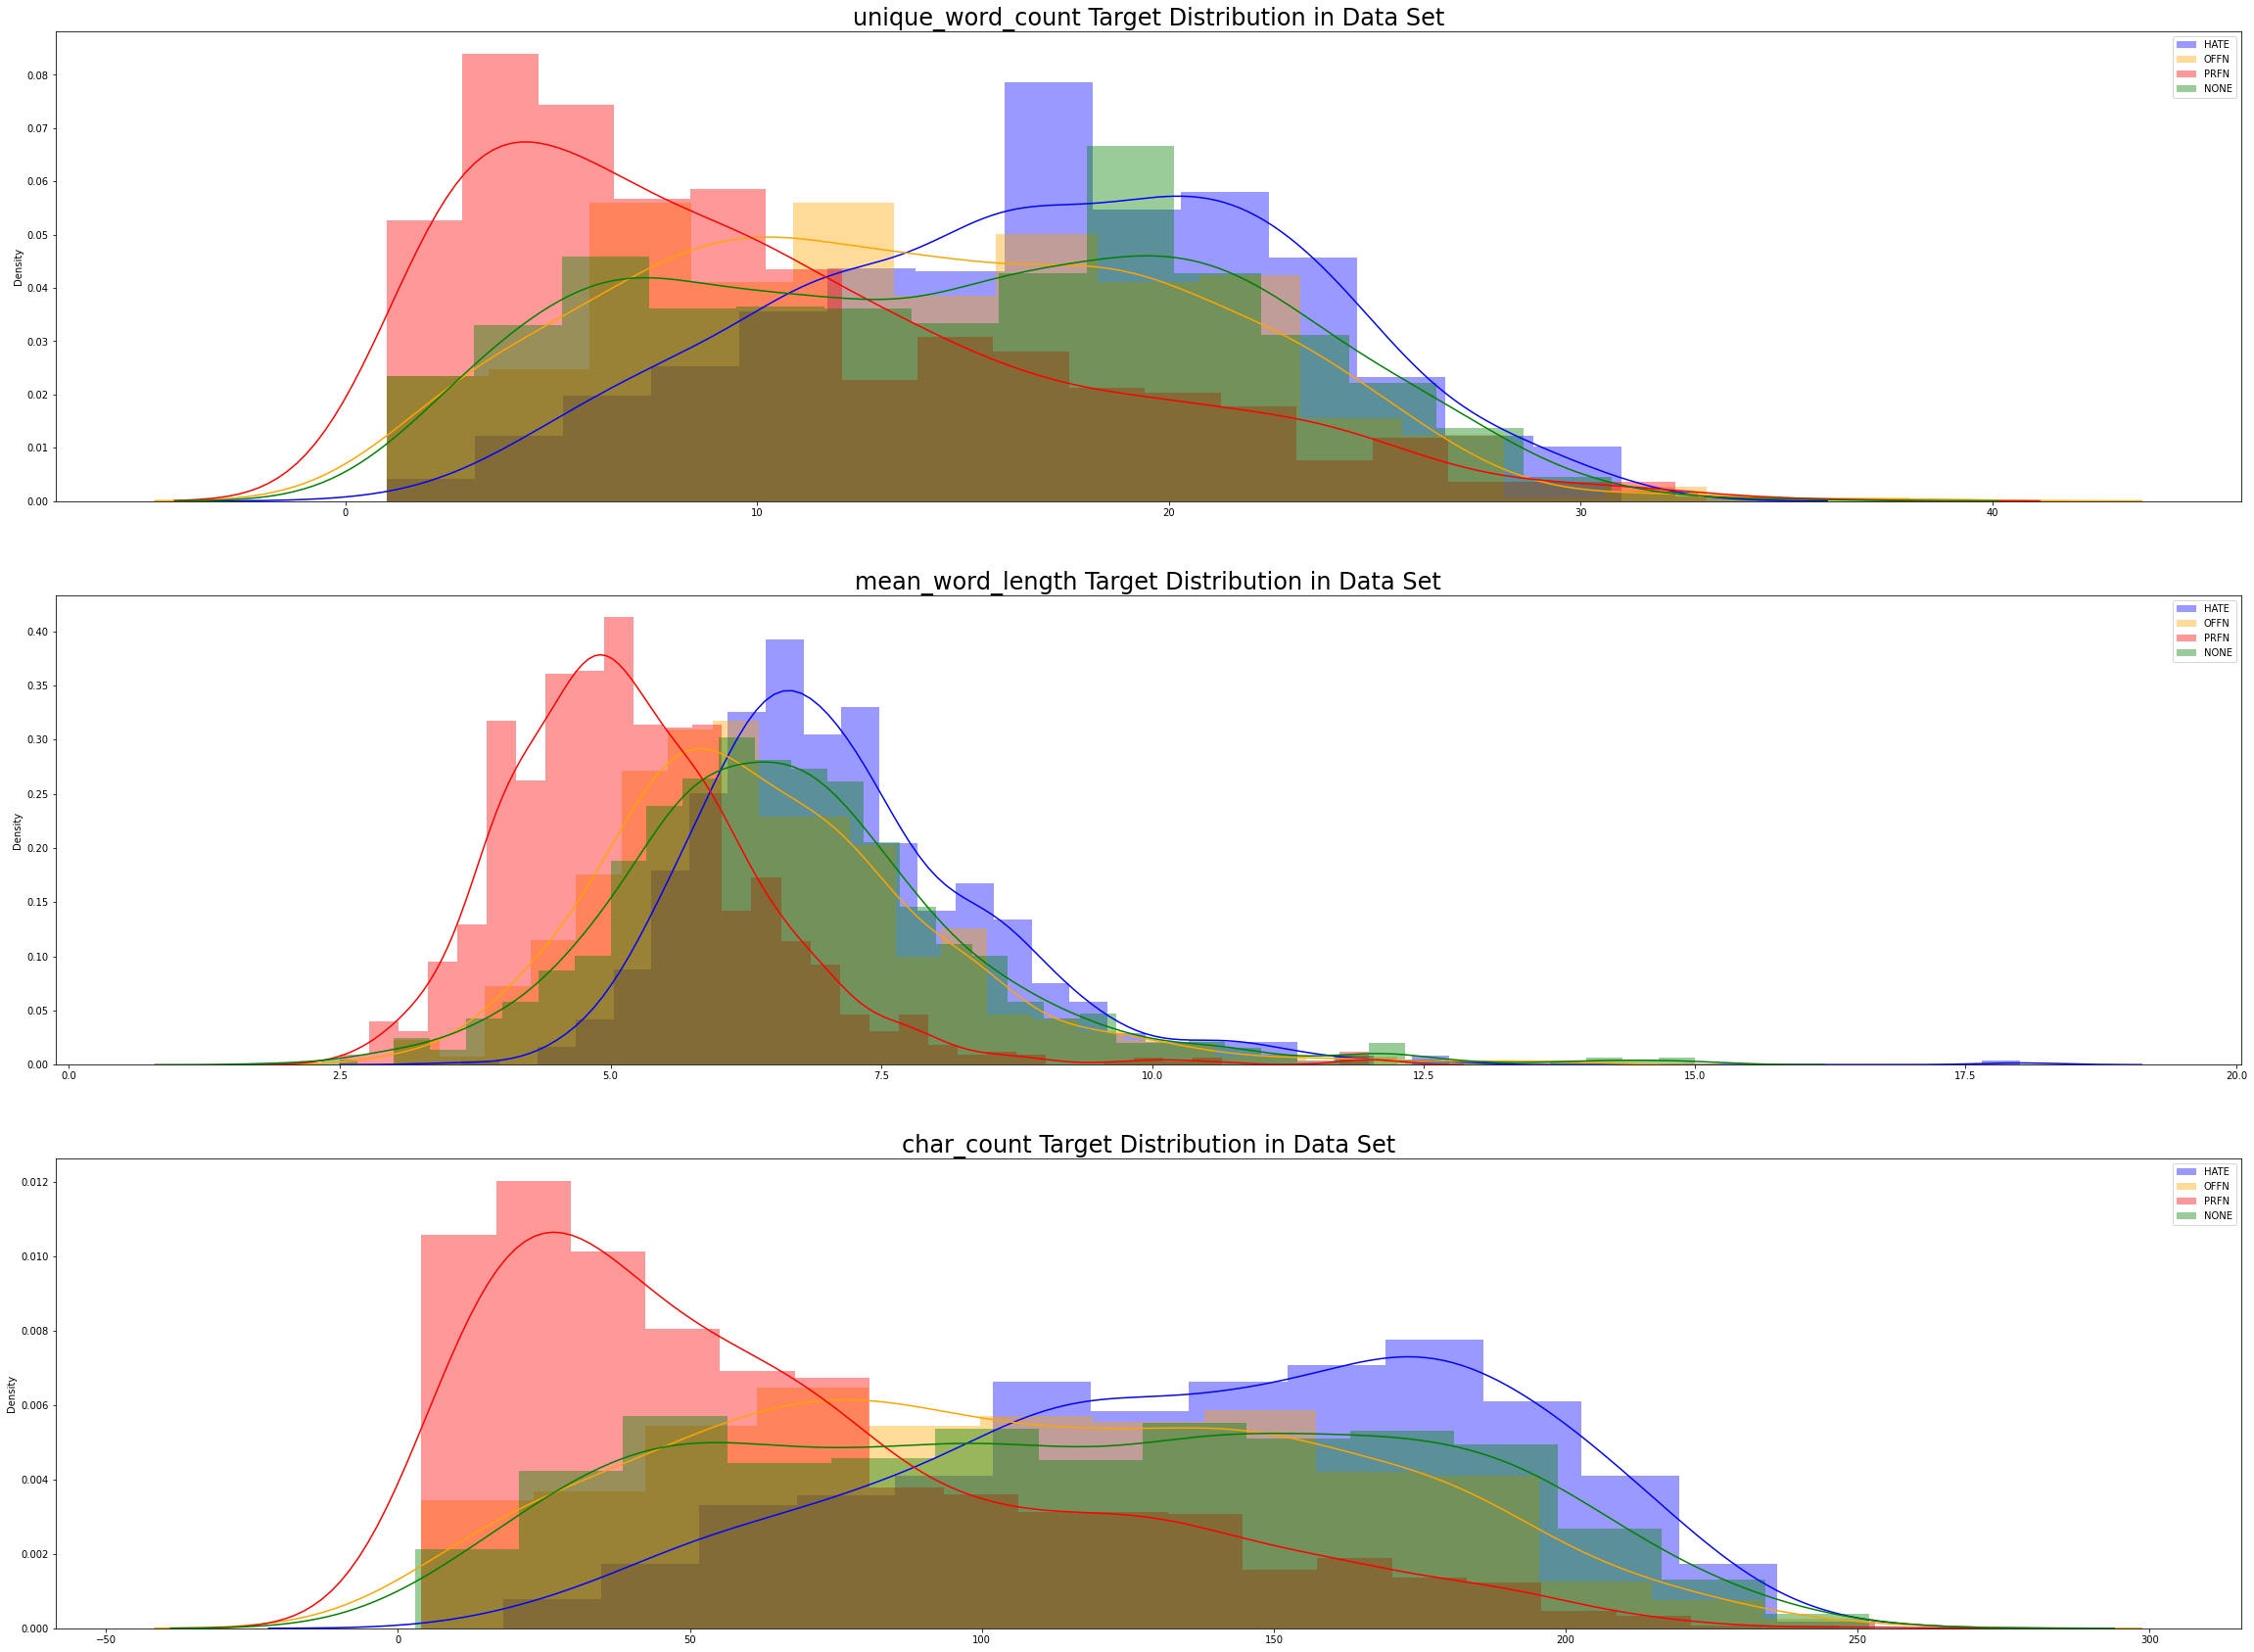

In [19]:
import seaborn as sns
METAFEATURES = ['unique_word_count','mean_word_length','char_count']
hate= dataframe['task_2'] == 'HATE'
offn = dataframe['task_2'] == 'OFFN'
prfn = dataframe['task_2'] == 'PRFN'
none = dataframe['task_2'] == 'NONE'

fig, axes = plt.subplots(nrows=len(METAFEATURES), figsize=(40, 30))
for i, feature in enumerate(METAFEATURES):
    sns.distplot(dataframe.loc[hate][feature], label='HATE', ax=axes[i], color='blue')
    sns.distplot(dataframe.loc[offn][feature], label='OFFN', ax=axes[i], color='orange')
    sns.distplot(dataframe.loc[prfn][feature], label='PRFN', ax=axes[i], color='red')
    sns.distplot(dataframe.loc[none][feature], label='NONE', ax=axes[i], color='green')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
    axes[i].legend()
    axes[i].set_title(f'{feature} Target Distribution in Data Set', fontsize=24)

plt.show()